In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from funpymodeling.exploratory import status

In [2]:
# Para este caso nos interesa visualizar todas las columnas
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("marketing_campaign.csv", sep=';', index_col=0)

In [4]:
data.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Year_Birth,0,0.000000,0,0.000000,59,int64
1,Education,0,0.000000,0,0.000000,5,object
2,Marital_Status,0,0.000000,0,0.000000,8,object
3,Income,24,0.010714,0,0.000000,1974,float64
4,Kidhome,0,0.000000,1293,0.577232,3,int64
5,Teenhome,0,0.000000,1158,0.516964,3,int64
6,Dt_Customer,0,0.000000,0,0.000000,663,object
7,Recency,0,0.000000,28,0.012500,100,int64
8,MntWines,0,0.000000,13,0.005804,776,int64
9,MntFruits,0,0.000000,400,0.178571,158,int64


In [6]:
# Eliminamos las columnas Z_CostContact y Z_Revenue porque tienen un sólo valor posible.

data = data.drop(['Z_CostContact','Z_Revenue'], axis=1)

In [7]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [7]:
# ¿Qué hacemos con las fechas? Dt_Customer tipo object.
# La transformamos en una variable tipo datetime.
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%Y-%m-%d")

array([[<Axes: title={'center': 'Year_Birth'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>,
        <Axes: title={'center': 'Teenhome'}>,
        <Axes: title={'center': 'Dt_Customer'}>],
       [<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntMeatProducts'}>,
        <Axes: title={'center': 'MntFishProducts'}>],
       [<Axes: title={'center': 'MntSweetProducts'}>,
        <Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'NumDealsPurchases'}>,
        <Axes: title={'center': 'NumWebPurchases'}>,
        <Axes: title={'center': 'NumCatalogPurchases'}>],
       [<Axes: title={'center': 'NumStorePurchases'}>,
        <Axes: title={'center': 'NumWebVisitsMonth'}>,
        <Axes: title={'center': 'AcceptedCmp3'}>,
        <Axes: title={'center': 'AcceptedCmp4'}>,
        <Axes: title={'center': 'AcceptedC

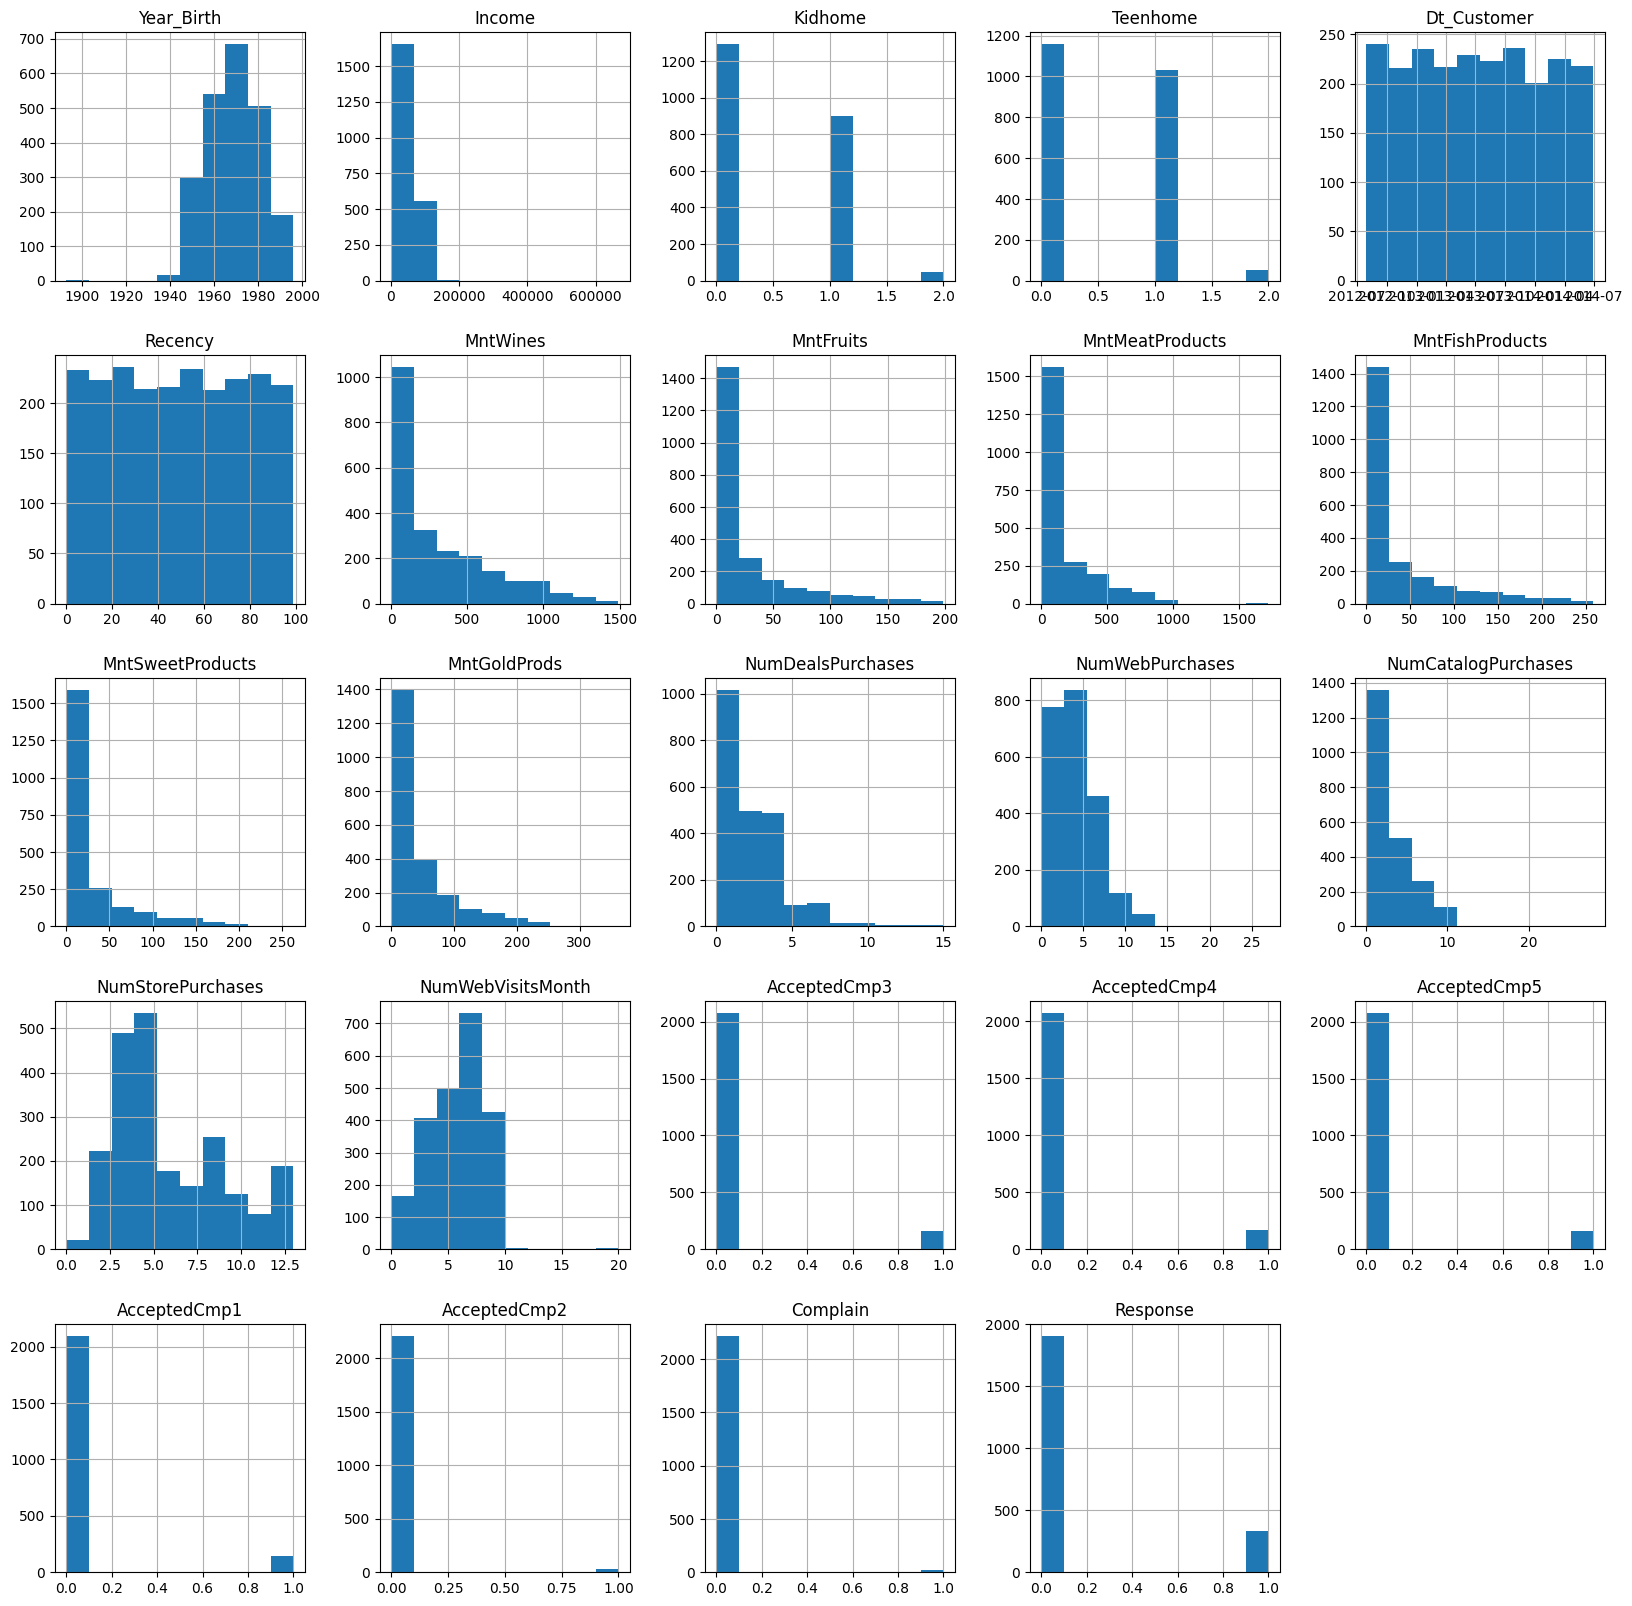

In [8]:
data.hist(figsize = (20,20))

In [9]:
# Podemos discretizar Year_Birth, Income, Recency, MntWines, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth
# Ojo con INCOME, que es la única columna que tiene NaN.
# ejemplo: 
# data2['duration_cat'], saved_bins = pd.qcut(data2['duration'], q=5, retbins=True)
# Discretizamos una columna, creando una nueva discretizada y luego borro la original, ya que en nuestro caso no nos interesa.

data1 = data


In [10]:
# Year_Birth
data1['Year_Birth_cat'], saved_bins_1 = pd.qcut(data1['Year_Birth'],
                              q=5,
                              retbins=True) # importante!

data1 = data1.drop(['Year_Birth'], axis=1)

# Recency
data1['Recency_cat'], saved_bins_2 = pd.qcut(data1['Recency'],
                              q=10,
                              retbins=True) # importante!

data1 = data1.drop(['Recency'], axis=1)

# MntWines
data1['MntWines_cat'], saved_bins_3 = pd.qcut(data1['MntWines'],
                              q=5,
                              retbins=True) # importante!
data1 = data1.drop(['MntWines'], axis=1)

# MntFruits
data1['MntFruits_cat'], saved_bins_4 = pd.qcut(data1['MntFruits'],
                              q=5,
                              retbins=True) # importante!

data1 = data1.drop(['MntFruits'], axis=1)

# MntMeatProducts
data1['MntMeatProducts_cat'], saved_bins_4 = pd.qcut(data1['MntMeatProducts'],
                              q=5,
                              retbins=True) # importante!

data1 = data1.drop(['MntMeatProducts'], axis=1)

# MntFishProducts
data1['MntFishProducts_cat'], saved_bins_14 = pd.qcut(data1['MntFishProducts'],
                              q=5,
                              retbins=True) # importante!

data1 = data1.drop(['MntFishProducts'], axis=1)

# MntSweetProducts
data1['MntSweetProductss_cat'], saved_bins_5 = pd.qcut(data1['MntSweetProducts'],
                              q=5,
                              retbins=True) # importante!

data1 = data1.drop(['MntSweetProducts'], axis=1)

# MntGoldProds
data1['MntGoldProds_cat'], saved_bins_6 = pd.qcut(data1['MntGoldProds'],
                              q=5,
                              retbins=True) # importante!

data1 = data1.drop(['MntGoldProds'], axis=1)

# NumDealsPurchases
data1['NumDealsPurchases_cat'], saved_bins_7 = pd.qcut(data1['NumDealsPurchases'],
                              q=3,
                              retbins=True) # importante!

data1 = data1.drop(['NumDealsPurchases'], axis=1)

# NumWebPurchases
data1['NumWebPurchases_cat'], saved_bins_8 = pd.qcut(data1['NumWebPurchases'],
                              q=3,
                              retbins=True) # importante!

data1 = data1.drop(['NumWebPurchases'], axis=1)

# NumCatalogPurchases
data1['NumCatalogPurchases_cat'], saved_bins_9 = pd.qcut(data1['NumCatalogPurchases'],
                              q=3,
                              retbins=True) # importante!

data1 = data1.drop(['NumCatalogPurchases'], axis=1)

# NumStorePurchases
data1['NumStorePurchases_cat'], saved_bins_10 = pd.qcut(data1['NumStorePurchases'],
                              q=5,
                              retbins=True) # importante!

data1 = data1.drop(['NumStorePurchases'], axis=1)

# NumWebVisitsMonth
data1['NumWebVisitsMonth_cat'], saved_bins_11 = pd.qcut(data1['NumWebVisitsMonth'],
                              q=4,
                              retbins=True) # importante!

data1 = data1.drop(['NumWebVisitsMonth'], axis=1)


In [11]:
# Income
data1['Income_cat'], saved_bins_12 = pd.qcut(data1['Income'],
                              q=6,
                              retbins=True) # importante!

data1 = data1.drop(['Income'], axis=1)

In [12]:
# Agregamos la categoría "Desconocido" a la columna Income_cat
data1['Income_cat']=data1['Income_cat'].cat.add_categories("Desconocido")

# Le asignamos a los 24 valores NaN de la columna Income_cat el valor categórico agregado en la línea anterior.
data1['Income_cat']=data1['Income_cat'].fillna(value="Desconocido")


In [18]:
data1['Income_cat']

ID
5524       (51381.5, 62996.667]
2174       (40265.333, 51381.5]
4141     (62996.667, 74529.167]
6182      (1729.999, 30001.667]
5324       (51381.5, 62996.667]
                  ...          
10870      (51381.5, 62996.667]
4001     (62996.667, 74529.167]
7270       (51381.5, 62996.667]
8235     (62996.667, 74529.167]
9405       (51381.5, 62996.667]
Name: Income_cat, Length: 2240, dtype: category
Categories (7, object): [(1729.999, 30001.667] < (30001.667, 40265.333] < (40265.333, 51381.5] < (51381.5, 62996.667] < (62996.667, 74529.167] < (74529.167, 666666.0] < 'Desconocido']

In [23]:
# Dt_Customer
data1['Dt_Customer_cat'], saved_bins_13 = pd.qcut(data1['Dt_Customer'],
                              q=5,
                              retbins=True) # importante!

data1 = data1.drop(['Dt_Customer'], axis=1)

In [24]:
data1['Dt_Customer_cat']

ID
5524     (2012-07-29 23:59:59.999999999, 2012-12-12]
2174                        (2014-02-07, 2014-06-29]
4141               (2013-05-02, 2013-09-17 09:36:00]
6182                        (2014-02-07, 2014-06-29]
5324               (2013-09-17 09:36:00, 2014-02-07]
                            ...                     
10870              (2013-05-02, 2013-09-17 09:36:00]
4001                        (2014-02-07, 2014-06-29]
7270               (2013-09-17 09:36:00, 2014-02-07]
8235               (2013-09-17 09:36:00, 2014-02-07]
9405     (2012-07-29 23:59:59.999999999, 2012-12-12]
Name: Dt_Customer_cat, Length: 2240, dtype: category
Categories (5, interval[datetime64[ns], right]): [(2012-07-29 23:59:59.999999999, 2012-12-12] < (2012-12-12, 2013-05-02] < (2013-05-02, 2013-09-17 09:36:00] < (2013-09-17 09:36:00, 2014-02-07] < (2014-02-07, 2014-06-29]]

In [35]:
status(data1)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Education,0,0.0,0,0.000000,5,object
1,Marital_Status,0,0.0,0,0.000000,8,object
2,Kidhome,0,0.0,1293,0.577232,3,int64
3,Teenhome,0,0.0,1158,0.516964,3,int64
4,AcceptedCmp3,0,0.0,2077,0.927232,2,int64
5,AcceptedCmp4,0,0.0,2073,0.925446,2,int64
6,AcceptedCmp5,0,0.0,2077,0.927232,2,int64
7,AcceptedCmp1,0,0.0,2096,0.935714,2,int64
8,AcceptedCmp2,0,0.0,2210,0.986607,2,int64
9,Complain,0,0.0,2219,0.990625,2,int64


In [43]:
data2=pd.get_dummies(data1, dummy_na=False) # dummy_na=True --> crea la variable nulos para todas las variables categóricas. En este caso no es necesario porque el caso de Nulos que había ya lo he solucionado.
# Aplicamos el get_dummies en un df nuevo para no perder data1, por si queremos volver para atrás nuestros cambios.

In [47]:
data2['Response'] # Esta columna es la que queremos predecir con un modelo de clasificación RandomForest.

ID
5524     1
2174     0
4141     0
6182     0
5324     0
        ..
10870    0
4001     0
7270     0
8235     0
9405     1
Name: Response, Length: 2240, dtype: int64

In [49]:
# Clasificación

# Separación de X de Y, y luego TR de TS:

data_x = data2.drop('Response', axis=1)
data_y = data2['Response']

In [50]:
 # Esto lo hacíamos para evitar un warning y porque es buena práctica, pero si no lo hacemos, va a funcionar igual.

data_x = data_x.values
data_y = data_y.values

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25)

In [52]:
# Creación del modelo predictivo

from sklearn.ensemble import RandomForestClassifier 

# Creamos 800 decision trees y elejimos como semilla random al 12. Puede ser cualquier número.
rf = RandomForestClassifier(n_estimators = 800, random_state = 12)

In [53]:
# Entrenamiento del modelo

rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=800, random_state=12)

In [84]:
# Guardamos el modelo en un archivo pickle :-)   .pickle = .pkl

import pickle
with open('rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Si lo quisiéramos cargar, sería de la siguiente manera: 
# rf_loaded = pickle.load(open(filename, 'rb'))

In [54]:
# Predicción de la clase y score

rf.predict(x_train)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
# Así conseguimos las probabilidades de cada predicción

pred_probs=rf.predict_proba(x_train)

pred_probs  

array([[0.26325  , 0.73675  ],
       [0.93875  , 0.06125  ],
       [0.9725   , 0.0275   ],
       ...,
       [0.9725   , 0.0275   ],
       [0.995    , 0.005    ],
       [0.9171875, 0.0828125]])

In [56]:
y_prob_tr=pred_probs[:,1]  # tomamos la columna de la derecha, o la segunda... la primera es la 0 y la segunda es la 1

y_prob_tr

array([0.73675  , 0.06125  , 0.0275   , ..., 0.0275   , 0.005    ,
       0.0828125])

In [57]:
# Matriz de confusión

# ConfusionMatrixDisplay asume 0.5 como punto de corte

from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

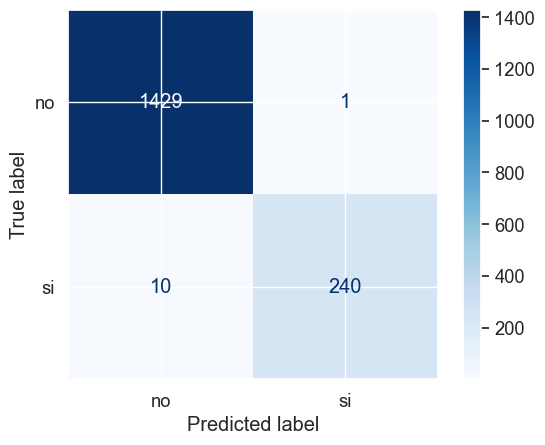

In [58]:
# Matriz de confusión con valores absolutos

sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='Blues',
    )

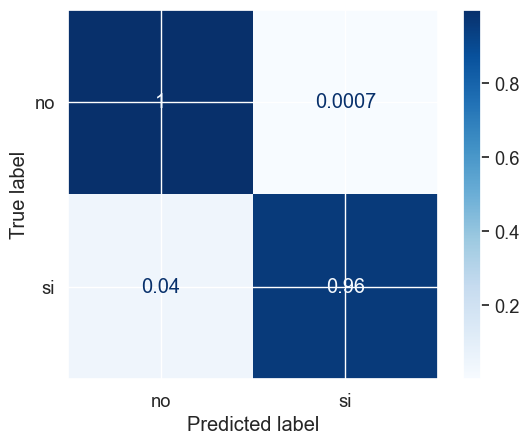

In [59]:
# Matriz de confusión con valores normalizados pro fila

sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='Blues',
    normalize='true',
    )

In [61]:
# Al no permitirnos variar el punto de corte, pues creamos la Matriz de confusión con crosstab:

y_pred1=rf.predict(x_train)

sns.set(font_scale=1)                 # Ajuste tamaño de letra (var global)
conf_mat1=pd.crosstab(index=y_train,    # filas = valor real
                     columns=y_pred1,   # columnas = valor predicho
                     rownames=['Actual'], 
                     colnames=['Pred'], 
                     normalize='index')


In [67]:
# sns.heatmap(conf_mat1, annot=True, cmap='Blues', fmt='g')

conf_mat1


Pred,0,1
Actual,,
0,0.999301,0.000699
1,0.040000,0.960000


In [70]:
# Seteamos el punto de corte nuevo, ¿Cómo lo elegimos?

# Una opción es que sea mayor al promedio:

y_prob_tr.mean()


0.15054356227023635

In [71]:
import numpy as np

# Recuerden actualizar este valor con el valor promedio que obtuvieron
np.where(y_prob_tr > y_prob_tr.mean(), "si", "no")

array(['si', 'no', 'no', ..., 'no', 'no', 'no'], dtype='<U2')

In [72]:
# Le asignamos 0 o 1:

y_pred2=np.where(y_prob_tr > y_prob_tr.mean(), 1, 0)


In [73]:
y_pred2

array([1, 0, 0, ..., 0, 0, 0])

In [74]:
# Matriz de confusion con el punto de corte customizado

conf_mat2=pd.crosstab(index=y_train, 
                      columns=y_pred2,      # ¡cambio!
                      rownames=['Actual'], 
                      colnames=['Pred'], 
                      normalize='index')

# sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g')

In [76]:
conf_mat2

Pred,0,1
Actual,,
0,0.973427,0.026573
1,0.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt

#sns.set(font_scale=1)       # Ajuste tamaño de letra (var global)
#fig, ax = plt.subplots(1,2)  

#sns.heatmap(conf_mat1, annot=True, cmap='Blues', fmt='g', ax=ax[0])
#sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g', ax=ax[1])

#fig.show(warn=False)

In [79]:
conf_mat1

Pred,0,1
Actual,,
0,0.999301,0.000699
1,0.040000,0.960000


In [80]:
conf_mat2

Pred,0,1
Actual,,
0,0.973427,0.026573
1,0.000000,1.000000


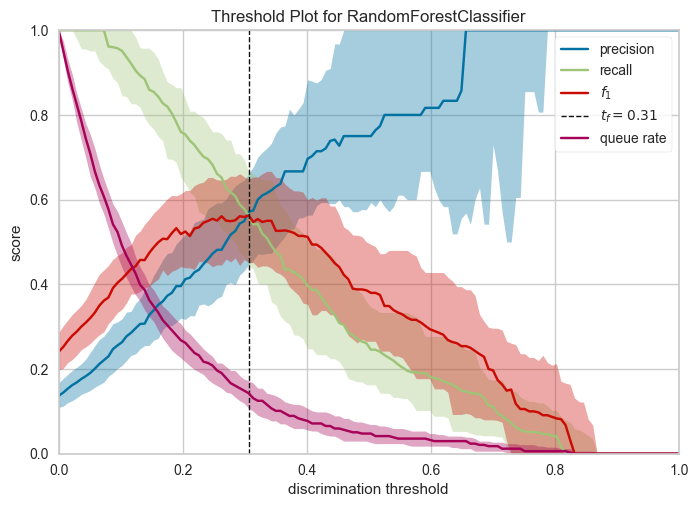

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [81]:
# Analizamos los distintos puntos de corte

# Nunca elegir un punto de corte con los datos de testing

#!pip3 install yellowbrick

from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(rf)

visualizer.fit(x_train, y_train)        # Ajustar data al visualizador
visualizer.show()                       # Mostrar figura


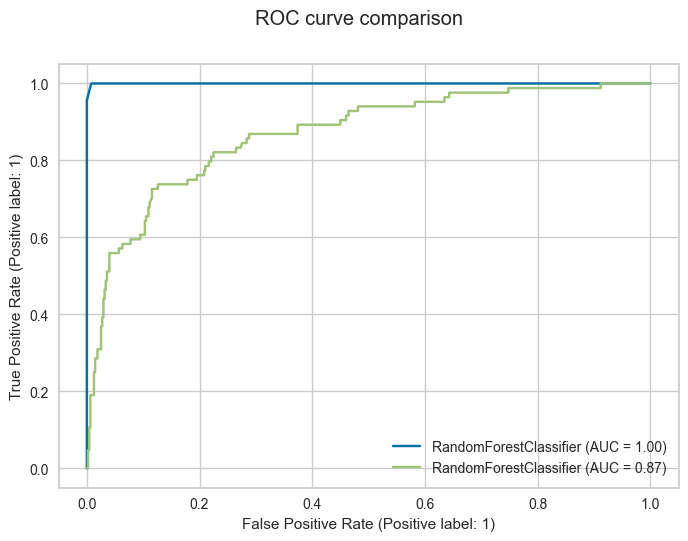

In [82]:
# Curva ROC

# Graficamos para training y para test

from sklearn.metrics import RocCurveDisplay

tr_disp = RocCurveDisplay.from_estimator(rf, x_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

In [83]:
# Para el modelo entrenado podemos notar que las curvas de la gráfica superior están muy lejos una de la otra y además la azul, que corresponde a la data de training, pues el AUC da 1. 
# Esto se puede entender como que el modelo aprendió data de memoria y realmente no un patrón como que queremos.

# SE PODRÍA PROBAR CORRER EL PUNTO DE CORTE A 0,31, COMO NOS RECOMIENDA LA GRÁFICA DEL DiscriminationThreshold.

# TAMBIÉN SE PODRÍA REENTRENAR EL MODELO CON MÁS ESTIMATORS Y BRINDAR MÁS DATA DE TESTING Y MENOS DE TRAINING. 


In [ ]:
#- Creen un modelo con regresión lineal y con Random Forest + GridsearchCV para predecir la columna `Income`.

In [99]:
# Regresión Lineal

# Haremos una REGRESIÓN LINEAL partiendo de data1, que  el mismo df que usamos para crear el modelo anterior de RandomForest
# El objetivo de la Regresión Lineal será inferir el valor de Income.

# Tomamos data1 y eliminamos la columna Income_cat, ya que necesitamos la original, Income, la cual la tomamos del df original --> data

data1 = data1.drop(['Income_cat'], axis=1)
data1['Income'] = data['Income']

In [112]:
status(data1)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Education,0,0.0,0,0.000000,5,object
1,Marital_Status,0,0.0,0,0.000000,8,object
2,Kidhome,0,0.0,1293,0.577232,3,int64
3,Teenhome,0,0.0,1158,0.516964,3,int64
4,AcceptedCmp3,0,0.0,2077,0.927232,2,int64
5,AcceptedCmp4,0,0.0,2073,0.925446,2,int64
6,AcceptedCmp5,0,0.0,2077,0.927232,2,int64
7,AcceptedCmp1,0,0.0,2096,0.935714,2,int64
8,AcceptedCmp2,0,0.0,2210,0.986607,2,int64
9,Complain,0,0.0,2219,0.990625,2,int64


In [113]:
# ¿Qué hago en este caso con los Nan de Income, que son enteros, y no categories?
# Le asigno un 0 para probar, pero no es lo que corresponde, el promedio tampoco debería serlo.

data1['Income']=data1['Income'].fillna(value=0)

In [114]:
# Casteamos Income, de float a int

data1['Income'] = data1['Income'].astype(int)


In [115]:
# Le aplico un get_dummies y separo la data Y de X.

data3=pd.get_dummies(data1, dummy_na=False)

x_data_reg = data3.drop('Income', axis=1)
y_data_reg = data3['Income']

In [116]:
y_data_reg

ID
5524     58138
2174     46344
4141     71613
6182     26646
5324     58293
         ...  
10870    61223
4001     64014
7270     56981
8235     69245
9405     52869
Name: Income, Length: 2240, dtype: int32

In [117]:
x_data_reg = x_data_reg.values
y_data_reg = y_data_reg.values

In [118]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data_reg, y_data_reg, test_size=0.3)

In [119]:
from sklearn.linear_model import LinearRegression

# a.Creamos modelo
model = LinearRegression()

# b. fiteamos
model.fit(x_train, y_train)

# c. obtenemos predicciónes para tr y ts
pred_tr=model.predict(x_train)
pred_ts=model.predict(x_test)

In [120]:
pred_tr

array([76160., 65728., 81216., ..., 41312., 16576., 73920.])

In [121]:
# Creación del RF con hypertuning (usando grid search)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

model_rf = RandomForestRegressor()

In [122]:
params = {
    'n_estimators' : [10, 20, 500, 5000],
    'max_features': [50, 100],
    #'bootstrap': [False, True],
    #'max_depth': [50, 500],
    #'min_samples_leaf': [3, 50],
    #'min_samples_split': [10, 50],
}

grid_rf = GridSearchCV(estimator = model_rf,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5, 
                        verbose = 1
                        )

In [123]:
# La siguiente línea de código lleva varios minutos. Busca la mejor configuración de entrenamiento para entrenar el modelo.

grid_rf.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [50, 100],
                         'n_estimators': [10, 20, 500, 5000]},
             scoring='neg_mean_absolute_error', verbose=1)

In [124]:
grid_rf.best_estimator_

RandomForestRegressor(max_features=50, n_estimators=500)

In [125]:
# Predicción de casos

grid_rf.predict(x_train)
grid_rf.predict(x_test)

array([ 34610.22266667,  39075.206     ,  80578.402     ,  76712.084     ,
        44641.098     ,  34156.494     ,  19931.334     ,  79475.242     ,
        67310.646     ,  37703.662     ,  57780.028     ,  42756.116     ,
        25338.888     ,  31098.75466667,  44198.028     ,  34526.802     ,
        54804.184     ,  67666.232     ,  39553.842     ,  68611.218     ,
        48812.438     ,  28810.07      ,  24047.456     ,  38432.71133333,
        29757.07      ,  75874.094     ,  59409.36      ,  48456.544     ,
        58975.942     ,  76325.2       ,  32802.288     ,  65501.994     ,
        60463.93      ,  62841.564     ,  25895.578     ,  34939.856     ,
        19080.382     ,  26471.328     ,  78563.364     ,  49384.728     ,
        30357.58      ,  50442.3864    ,  48563.738     ,  64400.236     ,
        18509.624     ,  78004.106     ,  24918.536     ,  52265.138     ,
        76867.74      ,  86802.13      ,  26112.724     ,  21118.262     ,
        57144.428     ,  

In [126]:
# Análisis de las métricas de error (si logramos el neg_mean_absolute cercano a 0, es mucho mejor)

pd.concat([pd.DataFrame(grid_rf.cv_results_["params"]),
           pd.DataFrame(grid_rf.cv_results_["mean_test_score"], 
                        columns=["neg_mean_absolute_error"])],axis=1).sort_values('neg_mean_absolute_error', ascending=False)



,max_features,n_estimators,neg_mean_absolute_error
2,50,500,-6880.080412
3,50,5000,-6887.706830
7,100,5000,-7050.578251
1,50,20,-7065.722005
6,100,500,-7074.673623
5,100,20,-7293.344356
0,50,10,-7409.314293
4,100,10,-7580.125162


In [127]:
# Análisis métrca TR vs TS:

grid_rf.score(x_train, y_train)


-2501.672937487852

In [128]:
grid_rf.score(x_test, y_test)

-7724.986191439908

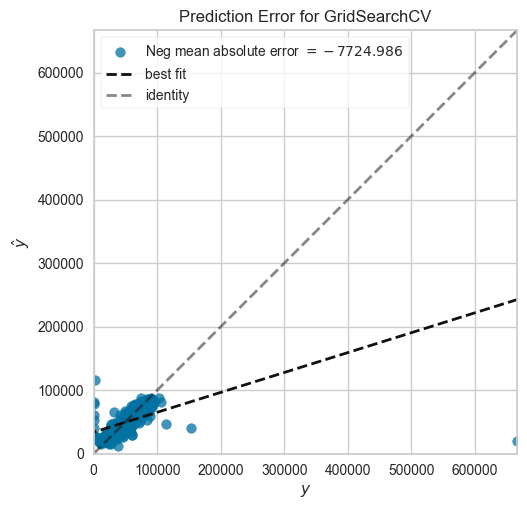

<Axes: title={'center': 'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [129]:
# Gráfico de la curva del error:

# La línea gris es lo que nos gustaría que sea y la negra el ajuste de regresión, de la regresión misma.

from yellowbrick.regressor import PredictionError

vis_pred_err = PredictionError(grid_rf)

vis_pred_err.fit(x_train, y_train)  # Fiteamos los datos al visualizador
vis_pred_err.score(x_test, y_test)  # Calculamos las métricas para test
vis_pred_err.show()                 # Visualizamos!



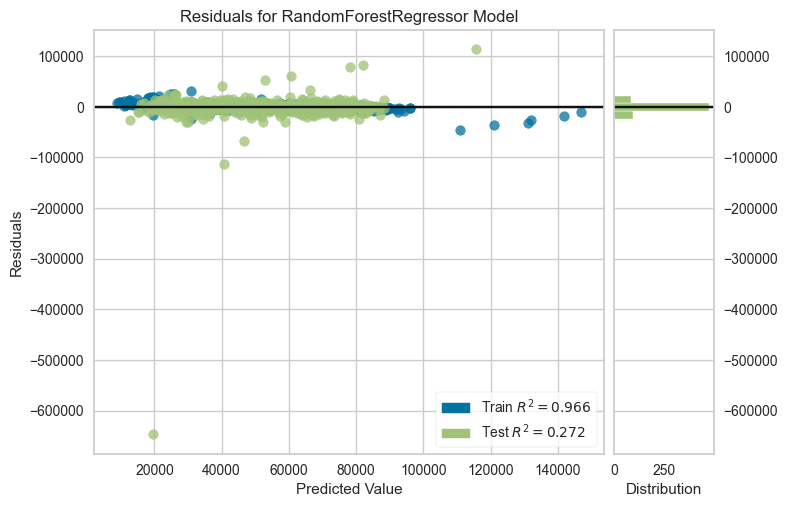

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [130]:
# Gráfico de residuos

from yellowbrick.regressor import ResidualsPlot

# ojo: poner best_estimator_
vis_res = ResidualsPlot(grid_rf.best_estimator_)


# Copy-paste de la doc oficial: 
vis_res.fit(x_train, y_train)  # Fiteamos los datos al visualizador
vis_res.score(x_test, y_test)  # Calculamos las métricas para test
vis_res.show()                 # Visualizamos!


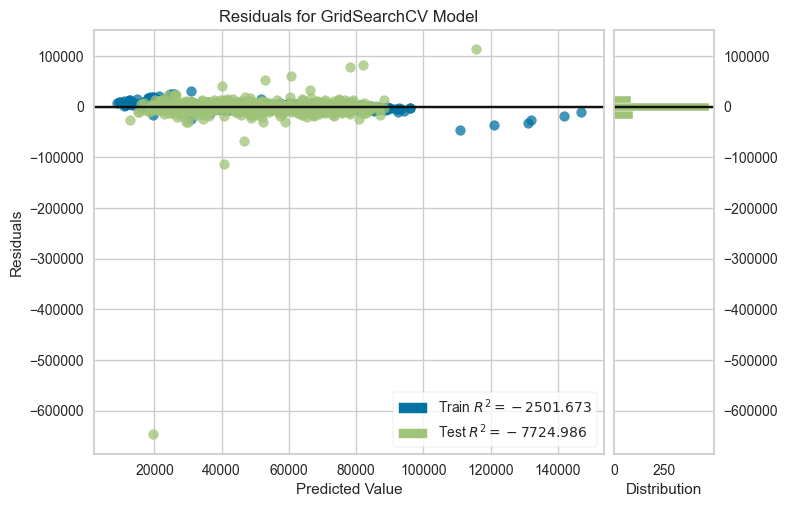

<Axes: title={'center': 'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [131]:
vis_res2 = ResidualsPlot(grid_rf)

# Copy-paste de la doc oficial: https://www.scikit-yb.org/en/latest/quickstart.html
vis_res2.fit(x_train, y_train)  # Fiteamos los datos al visualizador
vis_res2.score(x_test, y_test)  # Calculamos las métricas para test
vis_res2.show()                 # Visualizamos!

In [ ]:
# Doc oficial: https://www.scikit-yb.org/en/latest/quickstart.html

In [132]:
# Guardamos el modelo

filename = 'reg1.pkl'
pickle.dump(grid_rf, open(filename, 'wb')) # grid_rf = nuestro modelo